In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from matplotlib import pyplot as plt, style
style.use('ggplot')

In [2]:
collisions = pd.read_csv("data/collisions_routieres.csv")
collisions.head(3)
#collisions.describe()

,NO_SEQ_COLL,JR_SEMN_ACCDN,DT_ACCDN,CD_MUNCP,NO_CIVIQ_ACCDN,SFX_NO_CIVIQ_ACCDN,BORNE_KM_ACCDN,RUE_ACCDN,TP_REPRR_ACCDN,ACCDN_PRES_DE,...,NB_VICTIMES_VELO,VITESSE_AUTOR,LOC_X,LOC_Y,LOC_COTE_QD,LOC_COTE_PD,LOC_DETACHEE,LOC_IMPRECISION,LOC_LONG,LOC_LAT
0,SPVM _ 2012 _ 1,ME,2012/02/01,66102.0,3501.0,NaN,NaN,ST CHARLES,2.0,STAT,...,0,NaN,276517.37950,5.035127e+06,A,3,O,N,-73.861616,45.455505
1,SPVM _ 2012 _ 10,MA,2012/01/03,66023.0,NaN,NaN,NaN,TERR VILLE DE MTL,NaN,NaN,...,0,NaN,275209.46185,5.038619e+06,B,4,N,N,-73.878549,45.486871
2,SPVM _ 2012 _ 100,VE,2012/02/24,66023.0,NaN,NaN,NaN,JACQUES BIZARD,1.0,CHERRIER,...,0,50.0,275759.07900,5.039027e+06,A,1,N,O,-73.871542,45.490564


In [9]:
collisions.columns
collisions.head(100).to_csv('sample.csv')

Index(['NO_SEQ_COLL', 'JR_SEMN_ACCDN', 'DT_ACCDN', 'CD_MUNCP',
       'NO_CIVIQ_ACCDN', 'SFX_NO_CIVIQ_ACCDN', 'BORNE_KM_ACCDN', 'RUE_ACCDN',
       'TP_REPRR_ACCDN', 'ACCDN_PRES_DE', 'NB_METRE_DIST_ACCD',
       'CD_GENRE_ACCDN', 'CD_SIT_PRTCE_ACCDN', 'CD_ETAT_SURFC', 'CD_ECLRM',
       'CD_ENVRN_ACCDN', 'NO_ROUTE', 'CD_CATEG_ROUTE', 'CD_ETAT_CHASS',
       'CD_ASPCT_ROUTE', 'CD_LOCLN_ACCDN', 'CD_POSI_ACCDN', 'CD_CONFG_ROUTE',
       'CD_ZON_TRAVX_ROUTR', 'CD_PNT_CDRNL_ROUTE', 'CD_PNT_CDRNL_REPRR',
       'CD_COND_METEO', 'NB_VEH_IMPLIQUES_ACCDN', 'NB_MORTS',
       'NB_BLESSES_GRAVES', 'NB_BLESSES_LEGERS', 'HEURE_ACCDN', 'AN',
       'NB_VICTIMES_TOTAL', 'GRAVITE', 'REG_ADM', 'MRC',
       'nb_automobile_camion_leger', 'nb_camionLourd_tractRoutier',
       'nb_outil_equipement', 'nb_tous_autobus_minibus', 'nb_bicyclette',
       'nb_cyclomoteur', 'nb_motocyclette', 'nb_taxi', 'nb_urgence',
       'nb_motoneige', 'nb_VHR', 'nb_autres_types', 'nb_veh_non_precise',
       'NB_DECES_PIETO

In [8]:
collisions.shape

(204010, 68)

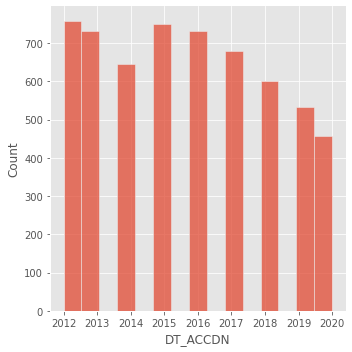

In [35]:
subs = collisions[~((collisions['NB_DECES_VELO'] ==0) &(collisions['NB_BLESSES_VELO']) == 0 &\
                    (collisions['NB_VICTIMES_VELO'] ==0))]
sns.displot(pd.DatetimeIndex(subs.DT_ACCDN).year).savefig('Accidents_over_the_years_involving_cyclists.png')

In [6]:
count_date = pd.DatetimeIndex(collisions.DT_ACCDN)
count_date.year.value_counts()

2012    31652
2013    31607
2017    22058
2016    21673
2015    21574
2018    21447
2014    21402
2019    19327
2020    13270
Name: DT_ACCDN, dtype: int64

In [38]:
collisions.CD_ETAT_SURFC.value_counts()

11.0    125706
12.0     33111
16.0     20179
18.0      5805
15.0      3059
17.0      2533
99.0       682
13.0       273
14.0       256
19.0        68
20.0        32
Name: CD_ETAT_SURFC, dtype: int64

In [39]:
comptage = pd.read_csv('data/comptages_vehicules_cyclistes_pietons.csv')

In [40]:
comptage

,Id_Reference,Id_Intersection,Nom_Intersection,Date,Periode,Heure,Minute,Seconde,Code_Banque,Description_Code_Banque,...,WBT,WBRT,Approche_Nord,Approche_Sud,Approche_Est,Approche_Ouest,Localisation_X,Localisation_Y,Longitude,Latitude
0,9398,3613,avenue d' Outremont / rue Jarry,2021-06-03,12:45:00,12,45,0,11,Velos,...,0,0,0,0,0,0,294128.0150,5.043326e+06,-73.636629,45.529766
1,8628,9597,avenue Royalmount / chemin Devonshire,2019-08-29,07:45:00,7,45,0,10,Pietons,...,0,0,3,0,1,0,291732.7190,5.039326e+06,-73.667189,45.493739
2,8730,1315,36 e Avenue / Sherbrooke,2019-10-01,14:00:00,14,0,0,11,Velos,...,0,0,1,0,0,1,304170.3585,5.057850e+06,-73.508080,45.660546
3,9188,1314,La Rousselière / Sherbrooke,2019-10-22,01:45:00,1,45,0,2,Camions Lourds,...,0,0,0,0,0,0,304404.8670,5.058831e+06,-73.505071,45.669367
4,8021,596,Marie-Anne / Saint-Hubert,2019-07-17,07:15:00,7,15,0,15,Camions porteurs,...,2,0,0,0,0,0,298633.1020,5.042747e+06,-73.578945,45.524610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441289,8260,920,Dickson / Sherbrooke,2019-07-13,17:45:00,17,45,0,11,Velos,...,0,0,1,0,0,0,300977.1615,5.048174e+06,-73.548980,45.573465
441290,8592,4005,55 e Avenue / François-Cusson,2019-08-20,09:30:00,9,30,0,10,Pietons,...,0,0,0,0,0,2,287363.8600,5.035115e+06,-73.722936,45.455747
441291,9478,1323,Chatelain / Rosemont,2021-09-23,11:45:00,11,45,0,2,Camions Lourds,...,2,0,0,0,0,0,299967.2650,5.048416e+06,-73.561922,45.575637
441292,9461,596,Marie-Anne / Saint-Hubert,2021-09-16,12:45:00,12,45,0,0,Autos,...,10,6,0,0,0,0,298633.1020,5.042747e+06,-73.578945,45.524610


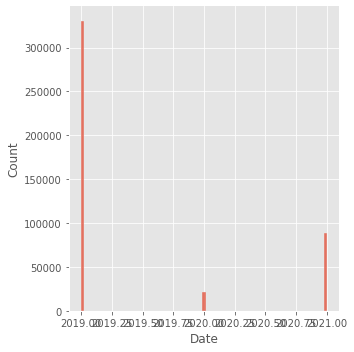

In [45]:
sns.displot(pd.DatetimeIndex(comptage.Date).year)

In [48]:
pd.DatetimeIndex(comptage.Date).year.value_counts()

2019    330331
2021     89077
2020     21886
Name: Date, dtype: int64

In [49]:
comptage2 = pd.read_csv("data/comptages_vehicules_cyclistes_pietons_2017_2019.csv")

In [52]:
pd.DatetimeIndex(comptage2.Date).year.value_counts()

2018    376011
2019    331835
2017    129754
Name: Date, dtype: int64

In [54]:
com = pd.concat((comptage,comptage2))

In [57]:
com.Id_Intersection.drop_duplicates()

0          3613
1          9597
2          1315
3          1314
4           596
          ...  
194191     1132
195269     9829
209789    19140
835971     6259
836008     1110
Name: Id_Intersection, Length: 1187, dtype: int64

In [58]:
d = pd.read_csv("data/cameras-de-circulation.csv")

In [59]:
d

,nid,url,titre,id-camera,id-arrondissement,arrondissement,description,latitude,longitude,axe-routier-nord-sud,axe-routier-est-ouest,url-image-en-direct,url-video-en-direct,url-image-direction-nord,url-image-direction-est,url-image-direction-sud,url-image-direction-ouest
241,https://ville.montreal.qc.ca/circulation/map/9...,Rue Saint-Donat et rue Sherbrooke,4,9,Mercier–Hochelaga-Maisonneuve,NaN,45.600983,-73.532344,Rue Saint-Donat,Rue Sherbrooke,https://ville.montreal.qc.ca/Circulation-Camer...,https://ville.montreal.qc.ca/circulationhttp:/...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,NaN
242,https://ville.montreal.qc.ca/circulation/map/1...,Rue du Fort-Lorette et boulevard Henri-Bourassa,5,1,Ahuntsic-Cartierville,NaN,45.567676,-73.659776,Rue du Fort-Lorette,Boulevard Henri-Bourassa,https://ville.montreal.qc.ca/Circulation-Camer...,https://ville.montreal.qc.ca/circulationhttp:/...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,NaN
243,https://ville.montreal.qc.ca/circulation/map/1...,Rue Fleury et boulevard Saint-Michel,6,10,Montréal-Nord,NaN,45.579663,-73.643572,Boulevard Saint-Michel,Rue Fleury,https://ville.montreal.qc.ca/Circulation-Camer...,https://ville.montreal.qc.ca/circulationhttp:/...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,NaN
244,https://ville.montreal.qc.ca/circulation/map/1...,Boulevard Langelier et boulevard Maurice-Duple...,8,10,Montréal-Nord,NaN,45.617130,-73.614814,Boulevard Langelier,Boulevard Maurice-Duplessis,https://ville.montreal.qc.ca/Circulation-Camer...,https://ville.montreal.qc.ca/circulationhttp:/...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,NaN
245,https://ville.montreal.qc.ca/circulation/map/9...,Rue De Boucherville et place Curatteau inter. Est,9,9,Mercier–Hochelaga-Maisonneuve,NaN,45.594200,-73.540224,Rue De Boucherville,Place Curatteau inter. Est,https://ville.montreal.qc.ca/Circulation-Camer...,https://ville.montreal.qc.ca/circulationhttp:/...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,https://ville.montreal.qc.ca/circulation/map/1...,Rue Bombardier et boulevard Langelier,528,16,Saint-Léonard,NaN,45.599850,-73.593820,Boulevard Langelier,Rue Bombardier,https://ville.montreal.qc.ca/Circulation-Camer...,https://ville.montreal.qc.ca/circulationhttp:/...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,NaN
812,https://ville.montreal.qc.ca/circulation/map/6...,Avenue Duluth et rue Saint-Urbain,529,6,Le Plateau-Mont-Royal,NaN,45.515810,-73.580530,Rue Saint-Urbain,Avenue Duluth,https://ville.montreal.qc.ca/Circulation-Camer...,https://ville.montreal.qc.ca/circulationhttp:/...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,https://ville.montreal.qc.ca/circulation/sites...,NaN
815,https://ville.montreal.qc.ca/circulation/map/4...,55e Avenue et rue Victoria,532,4,Lachine,NaN,45.444320,-73.719340,55e Avenue,Rue Victoria,https://ville.montreal.qc.ca/Circulation-Camer...,https://ville.montreal.qc.ca/circulatio